In [28]:
import pandas as pd
import sqlite3 as db
import requests
import numpy as np
from ydata_profiling import ProfileReport
import sweetviz as sv
from autoviz.AutoViz_Class import AutoViz_Class

Imported v0.1.806. Please call AutoViz in this sequence:
    AV = AutoViz_Class()
    %matplotlib inline
    dfte = AV.AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=1, lowess=False,
               chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30, save_plot_dir=None)


In [2]:
raw_df = pd.read_csv('filevine_case_study_justice - train set_source data set.csv')
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2697 entries, 0 to 2696
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          2697 non-null   int64 
 1   ID                  2697 non-null   int64 
 2   name                2697 non-null   object
 3   href                2697 non-null   object
 4   docket              2687 non-null   object
 5   term                2697 non-null   object
 6   first_party         2696 non-null   object
 7   second_party        2696 non-null   object
 8   facts               2697 non-null   object
 9   facts_len           2697 non-null   int64 
 10  majority_vote       2697 non-null   int64 
 11  minority_vote       2697 non-null   int64 
 12  first_party_winner  2685 non-null   object
 13  decision_type       2692 non-null   object
 14  disposition         2638 non-null   object
 15  issue_area          2584 non-null   object
dtypes: int64(5), object(11)


In [26]:
sw_df = raw_df[raw_df['first_party_winner'].notna()]
sw_report = sv.analyze(sw_df,'first_party_winner')
sw_report.show_html('sw_targ_var_report.html')

Done! Use 'show' commands to display/save.   |██████████| [100%]   00:00 -> (00:00 left)


Report sw_targ_var_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [4]:
profile = ProfileReport(raw_df, title="FV Train Set Report")
profile.to_file("train_set_report.html")

Summarize dataset:  78%|███████▊  | 18/23 [00:07<00:01,  3.39it/s, Calculate auto correlation]         C:\Users\Rachel\AppData\Roaming\Python\Python310\site-packages\ydata_profiling\model\correlations.py:66: UserWarning: There was an attempt to calculate the auto correlation, but this failed.
To hide this warning, disable the calculation
(using `df.profile_report(correlations={"auto": {"calculate": False}})`
If this is problematic for your use case, please report this as an issue:
https://github.com/ydataai/ydata-profiling/issues
(include the error message: 'could not convert string to float: 'plurality opinion'')
  warnings.warn(
Summarize dataset:  88%|████████▊ | 37/42 [00:10<00:00,  5.10it/s, Missing diagram heatmap]             C:\Users\Rachel\AppData\Roaming\Python\Python310\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val

In [65]:
raw_df.isnull().sum().sum()

201

In [66]:
raw_df.isna().sum().sum()

201

In [68]:
raw_df[raw_df.isna().any(axis=1)]

,Unnamed: 0,ID,name,href,docket,term,first_party,second_party,facts,facts_len,majority_vote,minority_vote,first_party_winner,decision_type,disposition,issue_area
26,2357,56015,Cline v. Oklahoma Coalition for Reproductive J...,https://api.oyez.org/cases/2013/12-1094,12-1094,2013,"Terry Cline, et al.",Oklahoma Coalition for Reproductive Justice,"<p>In 2011, the Oklahoma state legislature pas...",953,0,0,False,dismissal - improvidently granted,none,NaN
37,2865,62339,Cohens v. Virginia,https://api.oyez.org/cases/1789-1850/19us264,NaN,1789-1850,Philip and Mendes Cohen,Virginia,<p>An act of Congress authorized the operation...,362,7,0,False,dismissal - other,NaN,NaN
84,2491,59518,Cooper v. Aaron,https://api.oyez.org/cases/1957/1_misc,1 MISC,1957,"William G. Cooper et al., Members of the Board...","John Aaron, et al.",<p>The Governor and the Legislature of Arkansa...,770,9,0,False,per curiam,affirmed,NaN
101,3134,63006,Cox v. United States,https://api.oyez.org/cases/2017/16-1017,16-1017,2017,Laith G. Cox,United States,<p>This case was consolidated for argument wit...,125,9,0,False,dismissal - improvidently granted,NaN,Civil Rights
163,2746,61859,DeBacker v. Brainard,https://api.oyez.org/cases/1969/15,15,1969,Clarence De Backer,"Homer Brainard, Sherriff of Dodge County Nebraska",<p>A juvenile court judge declared 17-year-old...,821,6,2,False,per curiam,NaN,Criminal Procedure
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2610,2467,59307,"Williamson v. Lee Optical of Oklahoma, Inc.",https://api.oyez.org/cases/1940-1955/348us483,184,1940-1955,Williamson,"Lee Optical of Oklahoma, Inc.",<p>An Oklahoma law prohibited persons who were...,316,8,0,True,majority opinion,reversed in-part,NaN
2632,2908,62524,Wolf v. Colorado,https://api.oyez.org/cases/1940-1955/338us25,17,1940-1955,Julius A. Wolf,Colorado,"<p>Julius A. Wolf, Charles H. Fulton, and Bett...",436,6,3,False,majority opinion,affirmed,NaN
2649,2868,62345,Worcester v. Georgia,https://api.oyez.org/cases/1789-1850/31us515,NaN,1789-1850,Samuel A. Worcester,Georgia,"<p>In September 1831, Samuel A. Worcester and ...",1005,5,1,True,majority opinion,reversed/remanded,NaN
2658,2903,62500,Yakus v. United States,https://api.oyez.org/cases/1940-1955/321us414,374,1940-1955,Albert Yakus,United States,"<p>In 1942, Congress enacted the Emergency Pri...",686,0,0,NaN,NaN,NaN,NaN


In [36]:
raw_df.groupby('term').count().ID

term
1789-1850     9
1850-1900     8
1900-1940    16
1940-1955    16
1955          5
             ..
2016         58
2017         63
2018         66
2019         47
2020         42
Name: ID, Length: 70, dtype: int64

<Axes: ylabel='term'>

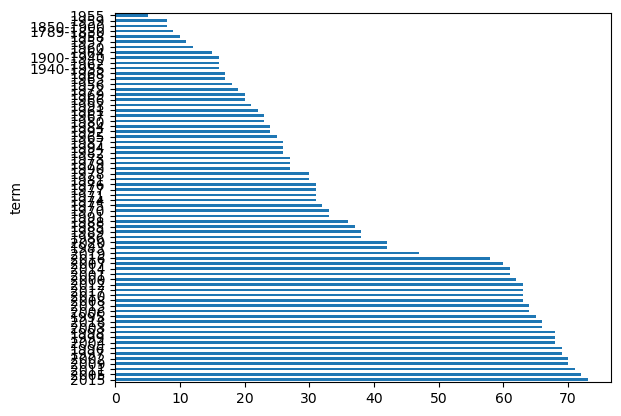

In [49]:
raw_df['term'].value_counts().plot(kind='barh')

In [5]:
raw_df.head(10)

,Unnamed: 0,ID,name,href,docket,term,first_party,second_party,facts,facts_len,majority_vote,minority_vote,first_party_winner,decision_type,disposition,issue_area
0,471,53057,City of Oklahoma City v. Tuttle,https://api.oyez.org/cases/1984/83-1919,83-1919,1984,City of Oklahoma City,"Rose Marie Tuttle, Individually and as Adminis...","<p>On October 10, 1980, an Oklahoma City polic...",952,7,1,True,plurality opinion,reversed,Civil Rights
1,2071,55708,City of Ontario v. Quon,https://api.oyez.org/cases/2009/08-1332,08-1332,2009,"City of Ontario, California et al.","Jeff Quon, et al.","<p>Employees of the City of Ontario, Californi...",1494,9,0,True,majority opinion,reversed/remanded,Criminal Procedure
2,169,51555,City of Philadelphia v. New Jersey,https://api.oyez.org/cases/1976/75-1150,75-1150,1976,City of Philadelphia et al.,New Jersey et al.,<p>A New Jersey statute prohibited the importa...,430,5,4,True,per curiam,vacated/remanded,Economic Activity
3,230,51844,City of Philadelphia v. New Jersey,https://api.oyez.org/cases/1977/77-404,77-404,1977,City of Philadelphia,New Jersey,<p>A New Jersey law prohibited the importation...,162,7,2,True,majority opinion,reversed,Economic Activity
4,1626,55235,City of Rancho Palos Verdes v. Abrams,https://api.oyez.org/cases/2004/03-1601,03-1601,2004,"City of Rancho Palos Verdes, California, et al.",Mark J. Abrams,"<p>Rancho Palos Verdes, a city in California, ...",1094,9,0,True,majority opinion,reversed/remanded,Civil Rights
5,477,53099,"City of Renton v. Playtime Theatres, Inc.",https://api.oyez.org/cases/1985/84-1360,84-1360,1985,City of Renton,"Playtime Theatres, Inc.","<p>The city of Renton, Washington, enacted a z...",342,7,2,True,majority opinion,reversed,First Amendment
6,619,53621,City of Richmond v. J. A. Croson Company,https://api.oyez.org/cases/1988/87-998,87-998,1988,City of Richmond,J. A. Croson Company,"<p>In 1983, the City Council of Richmond, Virg...",330,6,3,False,majority opinion,affirmed,Civil Rights
7,500,53212,City of Riverside v. Rivera,https://api.oyez.org/cases/1985/85-224,85-224,1985,City of Riverside,Rivera,"<p>In 1975, eight Chicano individuals were att...",1018,5,4,False,plurality opinion,affirmed,Attorneys
8,1627,55236,City of San Diego v. Roe,https://api.oyez.org/cases/2004/03-1669,03-1669,2004,"City of San Diego, California",John Roe,"<p>John Roe, a San Diego police officer, was f...",350,9,0,True,per curiam,reversed,First Amendment
9,1639,55248,City of Sherrill v. Oneida Indian Nation of Ne...,https://api.oyez.org/cases/2004/03-855,03-855,2004,"City of Sherrill, New York","Oneida Indian Nation of New York, et al.","<p>In the late 18th century, Congress set asid...",959,8,1,True,majority opinion,reversed/remanded,Civil Rights


In [22]:
raw_df['first_party_winner'].describe()

count     2685
unique       2
top       True
freq      1764
Name: first_party_winner, dtype: object

In [ ]:
raw_df['first_party_winner'].describe()

count     2685
unique       2
top       True
freq      1764
Name: first_party_winner, dtype: object

In [11]:
raw_df['first_party_winner'].value_counts(dropna=False)

first_party_winner
True     1764
False     921
NaN        12
Name: count, dtype: int64

In [24]:
name_dupes = raw_df[raw_df.duplicated(subset='name', keep=False)]
print(name_dupes.to_markdown())

|      |   Unnamed: 0 |    ID | name                                                                  | href                                          | docket   | term      | first_party                                              | second_party                                                                                          | facts                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 

In [22]:
name_dupes[name_dupes['first_party_winner'].isna()]

,Unnamed: 0,ID,name,href,docket,term,first_party,second_party,facts,facts_len,majority_vote,minority_vote,first_party_winner,decision_type,disposition,issue_area
2274,223,51803,United States v. California,https://api.oyez.org/cases/1977/5-orig,5-orig,1977,United States,California,<p>Channel Islands National Monument is a nati...,296,5,3,NaN,majority opinion,NaN,NaN


In [12]:
raw_df[raw_df['first_party_winner'].isna()]

,Unnamed: 0,ID,name,href,docket,term,first_party,second_party,facts,facts_len,majority_vote,minority_vote,first_party_winner,decision_type,disposition,issue_area
247,2528,60033,Dusky v. United States,https://api.oyez.org/cases/1959/504_misc,504 MISC,1959,Dusky,United States,<p>Dusky was charged with kidnapping and rape....,266,9,0,NaN,per curiam,reversed/remanded,NaN
873,2787,62121,Johnson v. Louisiana,https://api.oyez.org/cases/1970/69-5035,69-5035,1970,Johnson,Louisiana,<p>The Louisiana State Constitution and Code o...,333,5,4,NaN,majority opinion,affirmed,NaN
1364,2137,55781,Montana v. Wyoming and North Dakota,https://api.oyez.org/cases/2010/137-orig,137-orig,2010,Montana,Wyoming and North Dakota,"<p>1950, Montana, Wyoming and North Dakota sig...",967,7,1,NaN,majority opinion,NaN,NaN
1465,1322,54908,New Hampshire v. Maine,https://api.oyez.org/cases/2000/130_orig,130-orig,2000,New Hampshire,Maine,"<p>In 1977, a dispute between New Hampshire an...",1050,8,0,NaN,majority opinion,NaN,NaN
1466,1890,55514,New Jersey v. Delaware,https://api.oyez.org/cases/2007/134-orig,134-orig,2007,State of New Jersey,State of Delaware,<p>When British Petroleum (BP) wanted to build...,741,5,3,NaN,majority opinion,NaN,NaN
1475,3183,63090,New York State Rifle & Pistol Association Inc....,https://api.oyez.org/cases/2019/18-280,18-280,2019,"New York State Rifle and Pistol Association, I...","City of New York, New York, et al.",<p>The State of New York law prohibits the pos...,2188,6,3,NaN,per curiam,vacated/remanded,Judicial Power
1769,3203,63137,Retirement Plans Committee of IBM v. Jander,https://api.oyez.org/cases/2019/18-1165,18-1165,2019,"Retirement Plans Committee of IBM, et al.","Larry W. Jander, et al.","<p>In <a href=""https://www.oyez.org/cases/2013...",2931,9,0,NaN,per curiam,vacated/remanded,Economic Activity
2015,2631,61030,South Carolina v. Katzenbach,https://api.oyez.org/cases/1965/22_orig,22-orig,1965,South Carolina,Katzenbach,<p>The Voting Rights Act of 1965 prevented sta...,274,8,1,NaN,majority opinion,NaN,NaN
2132,3080,62911,Texas v. New Mexico and Colorado,https://api.oyez.org/cases/2017/141-orig,141-orig,2017,State of Texas,State of New Mexico and State of Colorado,"<p>The Rio Grande originates in Colorado, flow...",965,9,0,NaN,majority opinion,none,NaN
2139,2875,62377,The Civil Rights Cases,https://api.oyez.org/cases/1850-1900/109us3,NaN,1850-1900,The Civil Rights Cases,Various appellants,<p>The Civil Rights Act of 1875 affirmed the e...,478,8,1,NaN,majority opinion,reversed in-part,NaN


In [27]:
raw_df.groupby('first_party_winner').count()

,Unnamed: 0,ID,name,href,docket,term,first_party,second_party,facts,facts_len,majority_vote,minority_vote,decision_type,disposition,issue_area
first_party_winner,,,,,,,,,,,,,,,
False,921,921,921,921,915,921,921,920,921,921,921,921,921,880,870
True,1764,1764,1764,1764,1761,1764,1763,1764,1764,1764,1764,1764,1760,1752,1712


In [64]:
raw_df.issue_area.describe()

count                   2584
unique                    14
top       Criminal Procedure
freq                     709
Name: issue_area, dtype: object

In [63]:
raw_df.issue_area.value_counts()

issue_area
Criminal Procedure      709
Civil Rights            470
Economic Activity       439
First Amendment         290
Judicial Power          274
Due Process             102
Federalism               96
Privacy                  59
Unions                   46
Federal Taxation         45
Attorneys                32
Miscellaneous            19
Private Action            2
Interstate Relations      1
Name: count, dtype: int64

In [34]:
raw_df.groupby(['first_party_winner', 'issue_area']).count().ID

first_party_winner  issue_area          
False               Attorneys                 8
                    Civil Rights            163
                    Criminal Procedure      209
                    Due Process              34
                    Economic Activity       151
                    Federal Taxation         19
                    Federalism               44
                    First Amendment          92
                    Interstate Relations      1
                    Judicial Power          104
                    Miscellaneous            10
                    Privacy                  18
                    Private Action            1
                    Unions                   16
True                Attorneys                24
                    Civil Rights            307
                    Criminal Procedure      500
                    Due Process              68
                    Economic Activity       287
                    Federal Taxation         26

In [6]:
raw_df['decision_type'].unique()

array(['plurality opinion', 'majority opinion', 'per curiam',
       'dismissal - improvidently granted', 'dismissal - other',
       'equally divided', nan, 'memorandum', 'opinion of the court',
       'dismissal - moot', 'dismissal - rule 46'], dtype=object)

In [7]:
raw_df['disposition'].unique()

array(['reversed', 'reversed/remanded', 'vacated/remanded', 'affirmed',
       'none', nan, 'reversed in-part/remanded', 'reversed in-part',
       'vacated in-part/remanded', 'vacated'], dtype=object)

In [11]:
raw_df['href']

0       https://api.oyez.org/cases/1984/83-1919
1       https://api.oyez.org/cases/2009/08-1332
2       https://api.oyez.org/cases/1976/75-1150
3        https://api.oyez.org/cases/1977/77-404
4       https://api.oyez.org/cases/2004/03-1601
                         ...                   
2692     https://api.oyez.org/cases/2014/13-628
2693      https://api.oyez.org/cases/1992/92-94
2694    https://api.oyez.org/cases/2015/14-1418
2695    https://api.oyez.org/cases/2006/05-1508
2696    https://api.oyez.org/cases/1977/76-1484
Name: href, Length: 2697, dtype: object

In [12]:
raw_df['term'].describe()

count     2697
unique      70
top       2015
freq        73
Name: term, dtype: object

In [80]:
raw_df.term.value_counts(dropna=False).sort_values()

term
1955          5
1959          8
1850-1900     8
1789-1850     9
1958         10
             ..
2002         70
2009         70
2011         71
2005         72
2015         73
Name: count, Length: 70, dtype: int64

In [19]:
raw_df.describe()

,Unnamed: 0,ID,facts_len,majority_vote,minority_vote
count,2697.000000,2697.000000,2697.000000,2697.000000,2697.000000
mean,1653.994067,56355.736374,1108.582128,7.028921,1.712644
std,962.684940,3640.094799,527.232661,1.718479,1.606078
min,0.000000,50606.000000,26.000000,0.000000,0.000000
25%,809.000000,54289.000000,746.000000,5.000000,0.000000
50%,1662.000000,55271.000000,1051.000000,7.000000,2.000000
75%,2487.000000,59478.000000,1382.000000,9.000000,3.000000
max,3302.000000,63335.000000,5858.000000,9.000000,4.000000


array([[<Axes: title={'center': 'Unnamed: 0'}>,
        <Axes: title={'center': 'ID'}>],
       [<Axes: title={'center': 'facts_len'}>,
        <Axes: title={'center': 'majority_vote'}>],
       [<Axes: title={'center': 'minority_vote'}>, <Axes: >]],
      dtype=object)

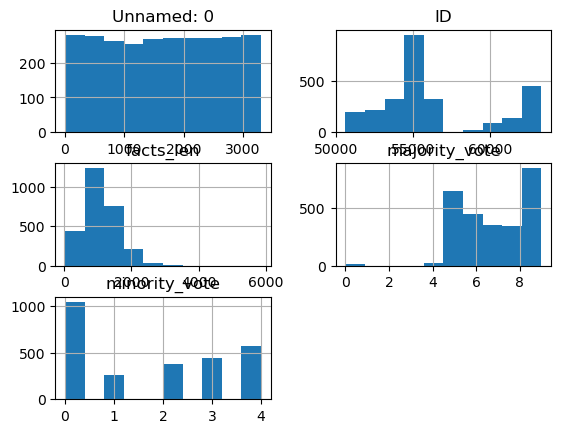

In [18]:
raw_df.hist()

In [ ]:
# df = json_normalize(response.json())

In [51]:
raw_df['href']

0       https://api.oyez.org/cases/1984/83-1919
1       https://api.oyez.org/cases/2009/08-1332
2       https://api.oyez.org/cases/1976/75-1150
3        https://api.oyez.org/cases/1977/77-404
4       https://api.oyez.org/cases/2004/03-1601
                         ...                   
2692     https://api.oyez.org/cases/2014/13-628
2693      https://api.oyez.org/cases/1992/92-94
2694    https://api.oyez.org/cases/2015/14-1418
2695    https://api.oyez.org/cases/2006/05-1508
2696    https://api.oyez.org/cases/1977/76-1484
Name: href, Length: 2697, dtype: object

In [70]:
raw_df['first_party'].value_counts(dropna=False)

first_party
United States                        201
Florida                               12
Maryland                              11
Michigan                               9
Illinois                               9
                                    ... 
Janus Capital Group, Inc., et al.      1
Alphonso James, Jr.                    1
James                                  1
Melene James                           1
Zurcher                                1
Name: count, Length: 2223, dtype: int64

In [71]:
raw_df[raw_df['first_party'].isna()]

,Unnamed: 0,ID,name,href,docket,term,first_party,second_party,facts,facts_len,majority_vote,minority_vote,first_party_winner,decision_type,disposition,issue_area
812,2762,61978,In re Winship,https://api.oyez.org/cases/1969/778,778,1969,NaN,In Re Winship,"<p>At age twelve, Samuel Winship was arrested ...",806,5,3,True,majority opinion,reversed,Civil Rights


In [69]:
raw_df['second_party'].value_counts(dropna=False)

second_party
United States                                                        249
California                                                            28
Illinois                                                              15
United States of America                                              14
Florida                                                               14
                                                                    ... 
Miller                                                                 1
Dulles                                                                 1
Plan Administrator for DuPont Savings and Investment Plan, et al.      1
Francisco Mendoza-Martinez                                             1
Stanford Daily                                                         1
Name: count, Length: 2122, dtype: int64

In [72]:
raw_df[raw_df['second_party'].isna()]

,Unnamed: 0,ID,name,href,docket,term,first_party,second_party,facts,facts_len,majority_vote,minority_vote,first_party_winner,decision_type,disposition,issue_area
807,1257,54848,In re Bauer,https://api.oyez.org/cases/1999/99-5440,99-5440,1999,In re Bauer,NaN,<p>Pro se petitioner Frederick W. Bauer sought...,602,8,1,False,per curiam,NaN,Civil Rights


In [57]:
raw_df.href.str.len().value_counts()

href
39    1178
38    1019
37     122
34     120
35      97
33      45
40      36
36      31
45      24
44      13
43       9
42       2
41       1
Name: count, dtype: int64

In [61]:
raw_df[raw_df.href.str.len() == 41]

,Unnamed: 0,ID,name,href,docket,term,first_party,second_party,facts,facts_len,majority_vote,minority_vote,first_party_winner,decision_type,disposition,issue_area
2548,2710,61627,Watts v. United States,https://api.oyez.org/cases/1968/1107_misc,1107 MISC,1968,Robert Watts,United States,"<p>On August 27, 1966 while attending a protes...",872,5,1,True,per curiam,reversed/remanded,NaN


In [30]:
AV = AutoViz_Class()
df = AV.AutoViz("filevine_case_study_justice - train set_source data set.csv")

Shape of your Data Set loaded: (2697, 16)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
    Number of Numeric Columns =  0
    Number of Integer-Categorical Columns =  3
    Number of String-Categorical Columns =  5
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  1
    Number of Numeric-Boolean Columns =  0
    Number of Discrete String Columns =  0
    Number of NLP String Columns =  4
    Number of Date Time Columns =  0
    Number of ID Columns =  3
    Number of Columns to Delete =  0
    16 Predictors classified...
        3 variable(s) removed since they were ID or low-information variables
        List of variables removed: ['Unnamed: 0', 'ID', 'href']
To fix these data quality issues in the

,Data Type,Missing Values%,Unique Values%,Minimum Value,Maximum Value,DQ Issue
Unnamed: 0,int64,0.000000,100,0.000000,3302.000000,Possible ID column: drop before modeling step.
ID,int64,0.000000,100,50606.000000,63335.000000,Possible ID column: drop before modeling step.
name,object,0.000000,97,,,No issue
href,object,0.000000,100,,,Possible ID column: drop before modeling step.
docket,object,0.370782,95,,,"10 missing values. Impute them with mean, median, mode, or a constant value such as 123., 2574 rare categories: Too many to list. Group them into a single category or drop the categories., Mixed dtypes: has 2 different data types: object, float,"
term,object,0.000000,2,,,27 rare categories: Too many to list. Group them into a single category or drop the categories.
first_party,object,0.037078,82,,,"1 missing values. Impute them with mean, median, mode, or a constant value such as 123., Mixed dtypes: has 2 different data types: object, float,"
second_party,object,0.037078,78,,,"1 missing values. Impute them with mean, median, mode, or a constant value such as 123., Mixed dtypes: has 2 different data types: object, float,"
facts,object,0.000000,100,,,No issue
facts_len,int64,0.000000,53,26.000000,5858.000000,Column has 63 outliers greater than upper bound (2336.00) or lower than lower bound(-208.00). Cap them or remove them.


Number of All Scatter Plots = 6
Could not draw Distribution Plot


[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to
[nltk_data]    |     C:\Users\Rachel\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\cmudict.zip.
[nltk_data]    | Downloading package gazetteers to
[nltk_data]    |     C:\Users\Rachel\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\gazetteers.zip.
[nltk_data]    | Downloading package genesis to
[nltk_data]    |     C:\Users\Rachel\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\genesis.zip.
[nltk_data]    | Downloading package gutenberg to
[nltk_data]    |     C:\Users\Rachel\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\gutenberg.zip.
[nltk_data]    | Downloading package inaugural to
[nltk_data]    |     C:\Users\Rachel\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\inaugural.zip.
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     C:\Users\Rachel\AppData\Roam

All Plots done
Time to run AutoViz = 64 seconds 

 ###################### AUTO VISUALIZATION Completed ########################
